# Predicting Bankruptcies in Taiwan

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import tree
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree

In [2]:
pd.set_option('display.max_rows', 75)

In [3]:
def find_best_k_recall(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall-Score: {}".format(best_score))

In [4]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [5]:
#bringing in file as pandas dataframe
df = pd.read_csv('data/taiwan_bankruptcy_data.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    operating gross margin   realized sales gross margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    operating profit rate   tax Pre-net interest rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    after-tax net interest rate   non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...  net income to total assets  total assets to GNP price  \
0  ...                    0.716845                   0.009219   
1  ...                    0.795297                   0.008323   
2  ...                    0.774670                   0.040003   
3  ...                    0.739555                   0.003252   
4  ...                    0.795016                   0.003878   

   No-credit interval  Gross profit to Sales  \
0            0.622879               0.601453   
1            0.623652               0.610237   
2            0.623841               0.601449   
3            0.622929               0.583538   
4            0.623521               0.598782   

   Net income to stockholder's Equity  liability to equity  \
0                            0.827890             0.290202   
1                            0.839969             0.283846   
2                            0.836774             0.290189   
3                            0.834697             0.281721   
4                            0.839973             0.278514   

   Degree of financial leverage (DFL)  \
0                            0.026601   
1                            0.264577   
2                            0.026555   
3                            0.026697   
4                            0.024752   

   Interest coverage ratio( Interest expense to EBIT )  \
0                                           0.564050     
1                                           0.570175     
2                                           0.563706     
3                                           0.564663     
4                                           0.575617     

   one if net income was negative for the last two year zero otherwise  \
0                       

### Pre-Processing data

In [6]:
f = np.array(df.isna().sum())
f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
#checking info on entire dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Bankrupt?                                                            6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest             6819 non-null   float64
 2    ROA(A) before interest and % after tax                              6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax                   6819 non-null   float64
 4    operating gross margin                                              6819 non-null   float64
 5    realized sales gross margin                                         6819 non-null   float64
 6    operating profit rate                                               6819 non-null   float64
 7    tax P

Looking through the info method I see all my datatype are float or int so no need for extra cleaning there. Also no nan values for any variables so clean there as well

Columns I predict will be significant predictors:
    
    - interest expense ratio
    - interest-bearing debt interest rate
    - total debt/total net worth
    - long-term liability to current assets
    - cash flow to liability 
    - current liabilities to current assets
    - Degree of financial leverage (DFL)

In [8]:
#checking for unique values
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize = True, ascending=False).head(5))
    print("-------------------------------------------------------------")

Bankrupt?
0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64
-------------------------------------------------------------
 ROA(C) before interest and depreciation before interest
0.490128    0.001760
0.516453    0.001613
0.499196    0.001466
0.513821    0.001466
0.501926    0.001320
Name:  ROA(C) before interest and depreciation before interest, dtype: float64
-------------------------------------------------------------
 ROA(A) before interest and % after tax
0.568251    0.001906
0.559693    0.001906
0.554187    0.001466
0.563127    0.001466
0.558929    0.001466
Name:  ROA(A) before interest and % after tax, dtype: float64
-------------------------------------------------------------
 ROA(B) before interest and depreciation after tax
0.538787    0.001466
0.558220    0.001466
0.552492    0.001466
0.551475    0.001466
0.543445    0.001320
Name:  ROA(B) before interest and depreciation after tax, dtype: float64
-------------------------------------------------------------
 oper

In [9]:
## contingent liabilities of 

In [10]:
#checking predictors for multicollinearity

test = df.corr().abs().stack().reset_index().sort_values(0,ascending=False)
test['pairs'] = list(zip(test.level_0,test.level_1))
test.set_index(['pairs'], inplace=True)
test.drop(columns=['level_1','level_0'], inplace=True)
test.columns = ['cc']
test.drop_duplicates(inplace=True)
test.sort_values('cc',ascending=False, inplace=True)
multicollinear_predictors = test[test.cc >.75]
multicollinear_predictors.reset_index(inplace=True)

In [11]:
multicollinear_predictors['column_1'] = multicollinear_predictors.pairs.map(lambda x : x[0])
multicollinear_predictors['column_2'] = multicollinear_predictors.pairs.map(lambda x : x[1])

<ipython-input-11-a30768636eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicollinear_predictors['column_1'] = multicollinear_predictors.pairs.map(lambda x : x[0])
<ipython-input-11-a30768636eb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicollinear_predictors['column_2'] = multicollinear_predictors.pairs.map(lambda x : x[1])


In [12]:
multicollinear_predictors

pairs        cc  \
0                  ( net worth/assets,  debt ratio %)  1.000000   
1   ( regular net profit growth rate,  regular net...  1.000000   
2    (Gross profit to Sales,  operating gross margin)  1.000000   
3   ( Net Value Per Share (C),  Net Value Per Shar...  0.999837   
4   ( operating gross margin,  realized sales gros...  0.999518   
5   ( realized sales gross margin, Gross profit to...  0.999518   
6   ( Net Value Per Share (A),  per Net Share Valu...  0.999342   
7   ( per Net Share Value (B),  Net Value Per Shar...  0.999179   
8   ( Operating profit/paid-in capital,  Operating...  0.998696   
9   ( regular net profit growth rate,  after-tax n...  0.996186   
10  ( continuous interest rate (after tax),  tax P...  0.993617   
11  ( ROA(C) before interest and depreciation befo...  0.986849   
12  ( after-tax net interest rate,  tax Pre-net in...  0.986379   
13  ( continuous interest rate (after tax),  after...  0.984452   
14    (current liability/equity, liability to equity)  0.963908   
15  ( Per Share Net profit before tax (yuan),  net...  0.962723   
16  ( ROA(A) before interest and % after tax, net ...  0.961552   
17  ( net profit before tax/paid-in capital,  Pers...  0.959461   
18       (liability to equity,  borrowing dependency)  0.955857   
19  ( ROA(B) before interest and depreciation afte...  0.955741   
20  ( Per Share Net profit before tax (yuan),  Per...  0.955591   
21  ( Cash flow to Sales,  working capitcal turnov...  0.948194   
22  ( ROA(C) before interest and depreciation befo...  0.940124   
23  ( tax Pre-net interest rate,  operating profit...  0.916448   
24  ( operating profit rate,  continuous interest ...  0.915544   
25  ( ROA(B) before interest and depreciation afte...  0.912040   
26  ( borrowing dependency, current liability/equity)  0.892772   
27  (net income to total assets,  ROA(C) before in...  0.887670   
28  ( Operating profit/paid-in capital,  net profi...  0.887370   
29  ( net profit before tax/paid-in capital,  Oper...  0.886157   
30    (operating funds to liability,  cash flow rate)  0.880562   
31  ( Operating Profit Per Share (Yuan),  Persiste...  0.876769   
32  ( Operating profit/paid-in capital,  Persisten...  0.873641   
33  ( after-tax net interest rate,  operating prof...  0.862191   
34  ( Per Share Net profit before tax (yuan),  Ope...  0.861813   
35  ( Operating profit/paid-in capital,  Per Share...  0.858310   
36   (current liability to assets,  net worth/assets)  0.842583   
37       ( debt ratio %, current liability to assets)  0.842583   
38  (equity to long-term liability,  borrowing dep...  0.806889   
39  ( borrowing dependency, Net income to stockhol...  0.806478   
40  (Retained Earnings/Total assets, net income to...  0.794189   
41  (liability to equity, Net income to stockholde...  0.791836   
42  (equity to long-term liability, liability to e...  0.778135   
43  ( Persistent EPS in the Last Four Seasons,  RO...  0.775006   
44  (working capital/equity,  contingent liabiliti...  0.767778   
45  ( Persistent EPS in the Last Four Seasons,  RO...  0.764828   
46  ( Persistent EPS in the Last Four Seasons,  RO...  0.764597   
47  ( net profit before tax/paid-in capital,  ROA(...  0.758234   
48  ( total asset turnover,  net worth turnover ra...  0.757414   
49  ( Persistent EPS in the Last Four Seasons,  pe...  0.755568   
50  (current assets/total assets, Quick asset/Tota...  0.755453   
51  ( Net Value Per Share (A),  Persistent EPS in ...  0.755409   
52  ( Persistent EPS in the Last Four Seasons,  Ne...  0.755217   
53  ( ROA(C) before interest and depreciation befo...  0.753339   
54  ( ROA(A) before interest and % after tax,  Per...  0.752578   
55  ( ROA(C) before interest and depreciation befo...  0.750564   

                                             column_1  \
0                                    net worth/assets   
1                      regular net profit growth rate   
2                               Gross profit to Sales   


In [13]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' operating gross margin', ' realized sales gross margin',
       ' operating profit rate', ' tax Pre-net interest rate',
       ' after-tax net interest rate',
       ' non-industry income and expenditure/revenue',
       ' continuous interest rate (after tax)', ' operating expense rate',
       ' research and development expense rate', ' cash flow rate',
       ' interest-bearing debt interest rate', ' tax rate (A)',
       ' per Net Share Value (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan)',
       ' Operating Profit Per Share (Yuan)',
       ' Per Share Net profit before tax (yuan)',
       ' realized sales gross profit growth rate',
       ' operating profit growt

In [14]:
#Unsurprisingly, there are many columns that are correlated above .75 as my features
# are different line items on a financial statement
# below are chosen columns I think that models will still have accurate results without while
# still dealing with multicollinearity

columns_to_drop = [' net worth/assets','Gross profit to Sales',' Net Value Per Share (A)',' per Net Share Value (B)',
                  ' realized sales gross margin',' Operating profit/paid-in capital',' regular net profit growth rate',
                  ' continuous interest rate (after tax)',' ROA(A) before interest and % after tax',' ROA(B) before interest and depreciation after tax',
                  ' tax Pre-net interest rate',' net profit before tax/paid-in capital',
                  ' borrowing dependency',' Per Share Net profit before tax (yuan)',
                  'liability to equity',' Cash flow to Sales','operating funds to liability',' Operating Profit Per Share (Yuan)',
                  ' after-tax net interest rate','one if net income was negative for the last two year zero otherwise',' contingent liabilities/net worth','one if total liabilities exceeds total assets zero otherwise']

In [15]:
pre_pro = df.drop(columns=columns_to_drop,axis=1)

In [16]:
# seperating out my target and predictors into X and y and training and test groups
X = pre_pro.drop(columns='Bankrupt?',axis=1)
y = pre_pro['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)


In [17]:
#checking for class imbalance which we clearly have with our data
#this will need to be accounted for by resmapling in some way
y.value_counts(normalize=True), y.value_counts()

(0    0.967737
 1    0.032263
 Name: Bankrupt?, dtype: float64,
 0    6599
 1     220
 Name: Bankrupt?, dtype: int64)

In [18]:
#making function to generate a panda df with relevant scores
def model_scores(y_true,y_pred,model_name):
    
    results = ({'Model':model_name,
                    'precision_score': precision_score(y_true,y_pred),
                    'recall_score': recall_score(y_true,y_pred),
                     'accuracy_score': accuracy_score(y_true,y_pred),
                     'f1_score':f1_score(y_true,y_pred)
                    })
    model_results = pd.DataFrame(data=results,index=[0])
    return model_results

In [19]:
#defining sigmoid function to scale my data from 0-1
def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))

In [20]:
#Using smote on my training data
#this will allow me to resample my training data and fit my model based on the resampled training data
# After doing so, when i predict based on my unchanged X_test values my class imbalance issues should not be as bad

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
X_train_smote_sig = X_train_smote.apply(sigmoid)
X_test_sig = X_test.apply(sigmoid)

## Models

### Logistic Regression Model

AUC: 0.9113539769277474
[[1486  161]
 [  14   44]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1647
           1       0.21      0.76      0.33        58

    accuracy                           0.90      1705
   macro avg       0.60      0.83      0.64      1705
weighted avg       0.96      0.90      0.92      1705



C:\Users\sergi\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


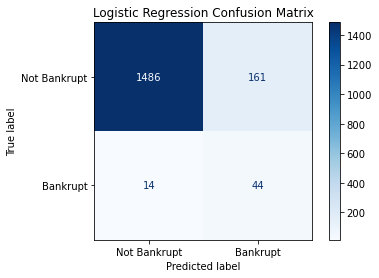

In [21]:
logreg = LogisticRegression(C=1e12,fit_intercept=True,solver='liblinear')
log_model = logreg.fit(X_train_smote_sig, y_train_smote)
y_hat_log = logreg.predict(X_test_sig)
y_score_log = log_model.decision_function(X_test_sig)
fpr,tpr,thresholds = roc_curve(y_test,y_score_log)

print('AUC: {}'.format(auc(fpr, tpr)))
cf = confusion_matrix(y_test,y_hat_log)

plot_confusion_matrix(log_model,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["Not Bankrupt", "Bankrupt"],
                      values_format=".5g")
plt.title("Logistic Regression Confusion Matrix")

print(confusion_matrix(y_test, y_hat_log))
print(classification_report(y_test, y_hat_log))

In [22]:
log_scores = model_scores(y_test,y_hat_log,'Logistic Regression')
log_scores

Model  precision_score  recall_score  accuracy_score  \
0  Logistic Regression         0.214634      0.758621        0.897361   

   f1_score  
0  0.334601

### Decision Tree Model

In [23]:
dtree = DecisionTreeClassifier(max_depth=12,min_samples_leaf=2,min_samples_split=9)

AUC: 0.7707587463099053
[[1545  102]
 [  23   35]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1647
           1       0.26      0.60      0.36        58

    accuracy                           0.93      1705
   macro avg       0.62      0.77      0.66      1705
weighted avg       0.96      0.93      0.94      1705



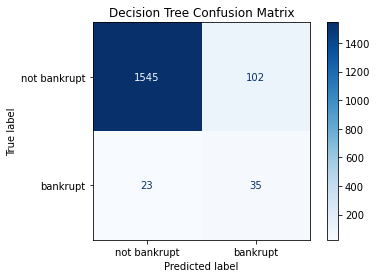

In [24]:
dtree.fit(X_train_smote_sig,y_train_smote)

y_pred_tree = dtree.predict(X_test_sig)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

print('AUC: {}'.format(auc(fpr, tpr)))
cf = confusion_matrix(y_test,y_pred_tree)

plot_confusion_matrix(dtree,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")
plt.title("Decision Tree Confusion Matrix")

print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

In [25]:
dtree_scores = model_scores(y_test,y_pred_tree,"Decision Tree")
dtree_scores

Model  precision_score  recall_score  accuracy_score  f1_score
0  Decision Tree         0.255474      0.603448        0.926686  0.358974

### Random Forest Model

In [26]:
forest = RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=5)

[[1494  153]
 [   9   49]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1647
           1       0.24      0.84      0.38        58

    accuracy                           0.90      1705
   macro avg       0.62      0.88      0.66      1705
weighted avg       0.97      0.90      0.93      1705



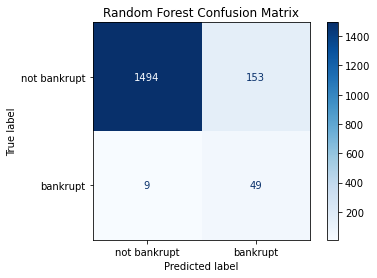

In [27]:
forest.fit(X_train_smote_sig,y_train_smote)

forest.predict(X_test_sig)

y_pred_forest = forest.predict(X_test_sig)

plot_confusion_matrix(forest,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")

plt.title("Random Forest Confusion Matrix")

print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

After running our Random forest model through gridsearchcv to optimize our hyperparameters we were able to improve our model all around from our prior decision tree. For our 1 value of our bankruptcy class 'target variable', we improved recall by .05 to .62 and precision from .26 to .38. F1 score and accuracy were also improved as well

In [28]:
#getting a tree from our random forest
rf_tree_1 = forest.estimators_[0]
plt.figure(figsize=(25,25), dpi=1000)
_ = tree.plot_tree(forest.estimators_[0], feature_names=X.columns, filled=True,
                   class_names = np.unique(y).astype('str'), rounded=True,max_depth=2)

In [29]:
rf_scores = model_scores(y_test,y_pred_forest,"Random Forest")
rf_scores

Model  precision_score  recall_score  accuracy_score  f1_score
0  Random Forest         0.242574      0.844828        0.904985  0.376923

### K-nearest Neighbors Model

AUC: 0.8091828402738521
[[1416  231]
 [  14   44]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1647
           1       0.16      0.76      0.26        58

    accuracy                           0.86      1705
   macro avg       0.58      0.81      0.59      1705
weighted avg       0.96      0.86      0.90      1705



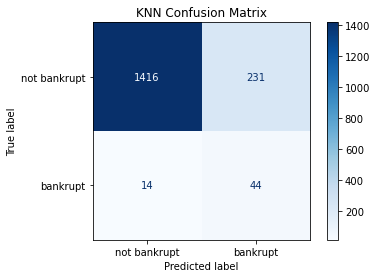

In [30]:
knn = KNeighborsClassifier(n_neighbors=13,p=1)
knn.fit(X_train_smote_sig,y_train_smote)
y_pred_knn = knn.predict(X_test_sig)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

print('AUC: {}'.format(auc(fpr, tpr)))
cf = confusion_matrix(y_test,y_pred_knn)

plot_confusion_matrix(knn,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")
plt.title("KNN Confusion Matrix")

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



In [31]:
knn_scores = model_scores(y_test,y_pred_knn,'KNN')
knn_scores

Model  precision_score  recall_score  accuracy_score  f1_score
0   KNN             0.16      0.758621        0.856305  0.264264

### Gradient Boosted Model

In [32]:
grad_clf = GradientBoostingClassifier(learning_rate=.2,max_depth=1,
                                      min_samples_leaf=7,min_samples_split=1.0,n_estimators=100)

AUC: 0.8510143835186234
[[1497  150]
 [  12   46]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1647
           1       0.23      0.79      0.36        58

    accuracy                           0.90      1705
   macro avg       0.61      0.85      0.66      1705
weighted avg       0.97      0.90      0.93      1705



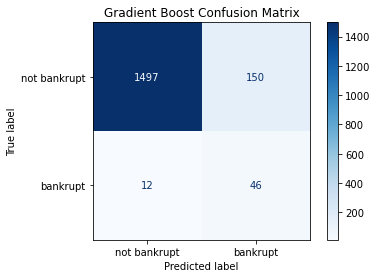

In [33]:
grad_clf.fit(X_train_smote_sig,y_train_smote)

y_pred_grad = grad_clf.predict(X_test_sig)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_grad)

print('AUC: {}'.format(auc(fpr, tpr)))
cf = confusion_matrix(y_test,y_pred_grad)

plot_confusion_matrix(grad_clf,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")
plt.title("Gradient Boost Confusion Matrix")

print(confusion_matrix(y_test, y_pred_grad))
print(classification_report(y_test, y_pred_grad))

In [34]:
grad_scores = model_scores(y_test,y_pred_grad,"Gradient Boost")
grad_scores

Model  precision_score  recall_score  accuracy_score  f1_score
0  Gradient Boost         0.234694      0.793103        0.904985  0.362205

### Adaboost Model

In [35]:
ada_clf = AdaBoostClassifier(base_estimator=forest)

AUC: 0.7486024747189246
[[1614   33]
 [  28   30]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1647
           1       0.48      0.52      0.50        58

    accuracy                           0.96      1705
   macro avg       0.73      0.75      0.74      1705
weighted avg       0.97      0.96      0.96      1705



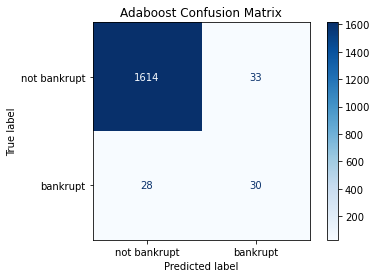

In [36]:
ada_clf.fit(X_train_smote_sig,y_train_smote)
y_pred_ada = ada_clf.predict(X_test_sig)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

print('AUC: {}'.format(auc(fpr, tpr)))
cf = confusion_matrix(y_test,y_pred_ada)

plot_confusion_matrix(ada_clf,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")
plt.title("Adaboost Confusion Matrix")

print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


In [37]:
ada_scores = model_scores(y_test,y_pred_ada,"Adaboost")
ada_scores

Model  precision_score  recall_score  accuracy_score  f1_score
0  Adaboost          0.47619      0.517241        0.964223  0.495868

### XGBoost

In [38]:
XG = XGBClassifier(objective='binary:logistic',learning_rate=.05,max_depth=1,min_child_weight=1.5,
                   n_estimators=300,subsample=.75,tree_method='approx',gamma=1.5)

AUC: 0.8774836170257312
[[1499  148]
 [   9   49]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1647
           1       0.25      0.84      0.38        58

    accuracy                           0.91      1705
   macro avg       0.62      0.88      0.67      1705
weighted avg       0.97      0.91      0.93      1705



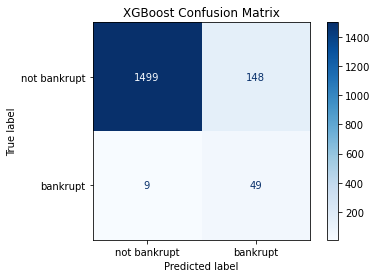

In [39]:
XG.fit(X_train_smote_sig,y_train_smote)
y_pred_XG = XG.predict(X_test_sig)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_XG)

print('AUC: {}'.format(auc(fpr, tpr)))
cf = confusion_matrix(y_test,y_pred_XG)

plot_confusion_matrix(XG,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")
plt.title("XGBoost Confusion Matrix")

print(confusion_matrix(y_test, y_pred_XG))
print(classification_report(y_test, y_pred_XG))


In [40]:
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1647
           1       0.25      0.84      0.38        58

    accuracy                           0.91      1705
   macro avg       0.62      0.88      0.67      1705
weighted avg       0.97      0.91      0.93      1705



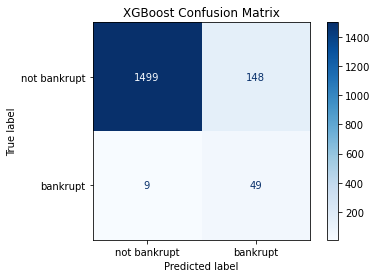

In [41]:
plot_confusion_matrix(XG,X_test_sig,y_test,cmap=plt.cm.Blues,
                     display_labels=["not bankrupt", "bankrupt"],
                      values_format=".5g")
plt.title("XGBoost Confusion Matrix")

plt.savefig('images/XGBoost_cm1.png')

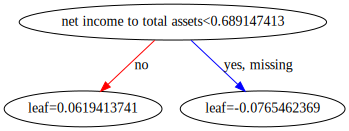

In [42]:
xgb.to_graphviz(XG, rankdir='UT')
 

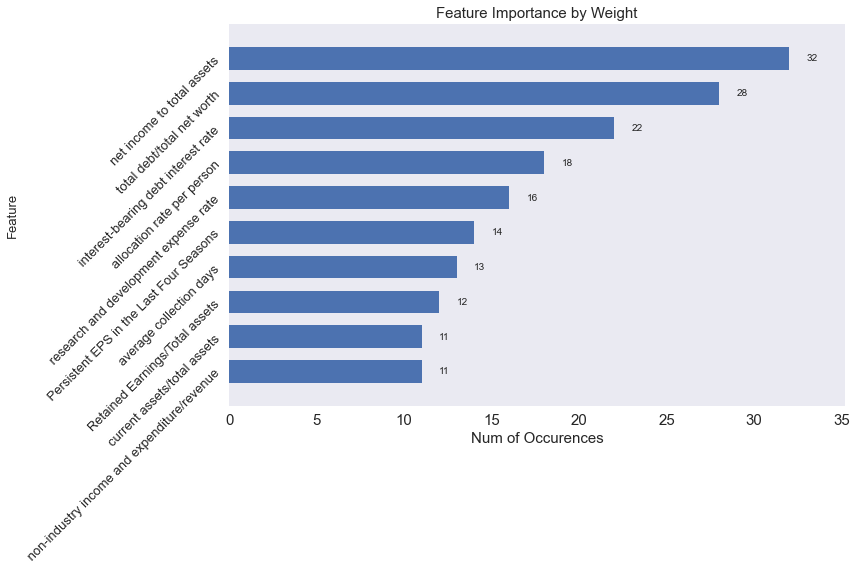

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(XG,max_num_features=10 ,importance_type='weight',ax=ax,height=.65,grid=False)
plt.yticks(fontsize=13, rotation=45)
plt.xticks(fontsize=15)
plt.xlabel('Num of Occurences',size=15)
plt.ylabel('Feature',size=13)
plt.title('Feature Importance by Weight',size=15)
plt.tight_layout()

plt.savefig('images/xgboost_weight.png')

In [44]:
XG_scores= model_scores(y_test,y_pred_XG,"XGBoost")
XG_scores

Model  precision_score  recall_score  accuracy_score  f1_score
0  XGBoost         0.248731      0.844828        0.907918  0.384314

In [45]:
final_results = pd.DataFrame(data=None,index=[0])

In [46]:
final_results = pd.concat([log_scores,dtree_scores,rf_scores,knn_scores,grad_scores,ada_scores,XG_scores])

In [47]:
final_results = final_results.set_index('Model')

In [48]:
final_results

precision_score  recall_score  accuracy_score  f1_score
Model                                                                       
Logistic Regression         0.214634      0.758621        0.897361  0.334601
Decision Tree               0.255474      0.603448        0.926686  0.358974
Random Forest               0.242574      0.844828        0.904985  0.376923
KNN                         0.160000      0.758621        0.856305  0.264264
Gradient Boost              0.234694      0.793103        0.904985  0.362205
Adaboost                    0.476190      0.517241        0.964223  0.495868
XGBoost                     0.248731      0.844828        0.907918  0.384314

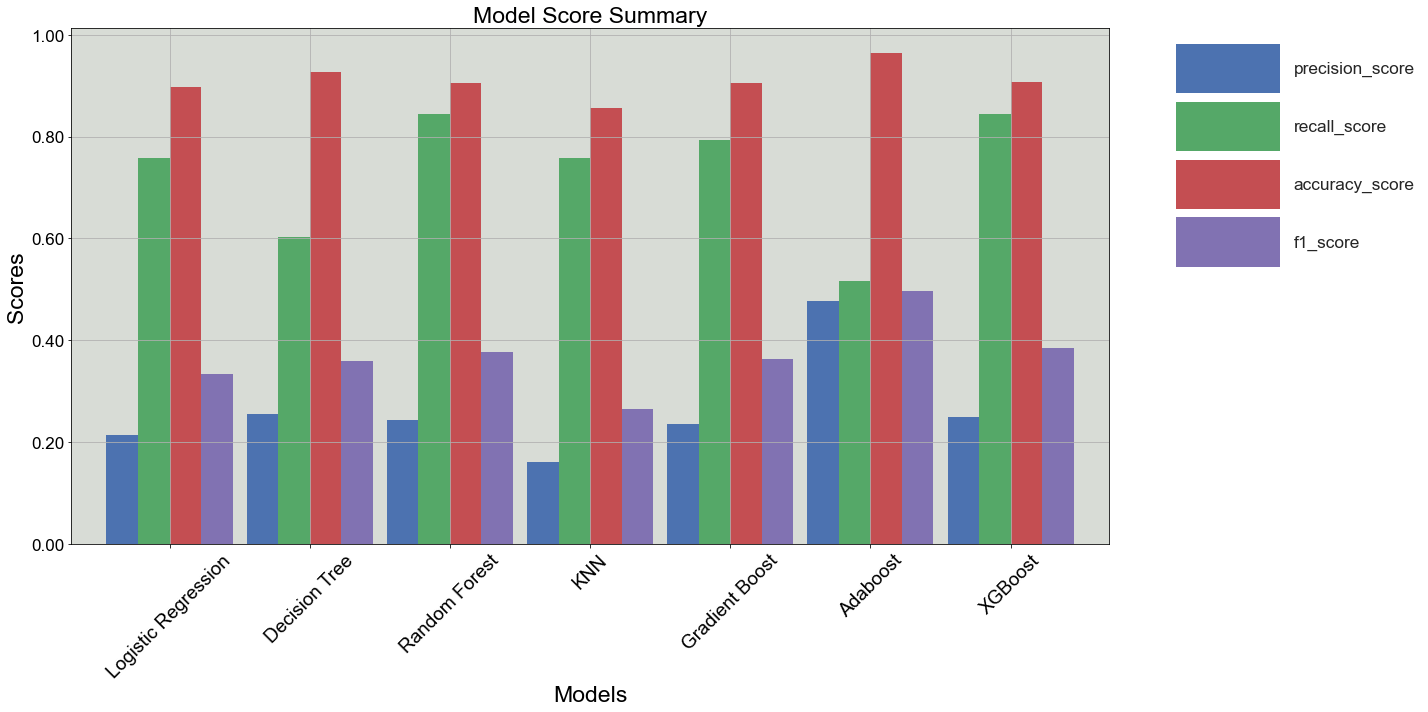

In [49]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

plt.style.use('seaborn')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_facecolor('#d8dcd6')
final_results.plot(kind='bar',figsize=(20,10), ax=ax,width=.9)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=( 1.05,1),
          ncol=1, fancybox=True, shadow=True,handlelength=6, handleheight=4,fontsize="xx-large")
plt.title("Model Score Summary",size=23)
plt.ylabel('Scores',size=23)
plt.xlabel('Models',size=23)
plt.xticks(size = 19)
plt.yticks(size=17)
plt.tight_layout()
plt.savefig('images/model_summary_scores')